# High temperature equilibrium properties of air

Starting from partition functions, we wish to compute equilibrium thermodynamic properties of air as a function of pressure and temperature. We will try to maintain some realism by assuming that air is a mixture of N$_2$ and O$_2$ at low temperatures (with a mixture percentage of 79% and 21%, respectively). 

At high temperatures, we'll consider the air as a mixture of N$_2$, N, O$_2$, O, NO, e$^-$, O$^+$, N$^+$, and NO$^+$. The partition functions and disassociations of the molecules we take from references (without deriving them here).

Our objective here is to compute, as functions of temperature and pressure:  

 - enthalpy, $h$
 - internal energy, $e$
 - entropy, $s$
 - mass fractions of the species, $c_i$
 - densities of the species, $\rho_i$
 - compressibility factor, $Z$

## Law of mass action
Our fundamental capability to compute the above requirements comes from the link between thermodynamic properties and quantum energy states, known as the Law of Mass Action:

$\begin{align}
K_p(T)&=\prod\limits_iP_i^{\nu_i}
\end{align}$

But the RHS can also be found from partition functions as:

$\begin{align}
\prod\limits_iP_i^{\nu_i}=\left(\cfrac{kT}{V}\right)^{\sum\limits_i\nu_i}\prod\limits_iQ_i^{\nu_i}e^{-\theta_d/T}
\end{align}$

So we're able to get partial pressures from partition functions

In [1]:
# INPUTS
Tmax = 15000; 							#K
Tmin = 2000; 							#K
N = 1000;


## INITIALIZE ALL VARIABLES
# Species numbers in program
# 1 = N2
# 2 = N
# 3 = O2
# 4 = O
# 5 = NO
# 6 = e-
# 7 = O+
# 8 = N+
# 9 = NO+
Y = 8; # NUMBER OF SPECIES
# PROGRAMMING VALUES
z = (Tmax - Tmin)/(N-1);

# UNIVERSAL CONSTANTS
RGAS = 8314; 							#J/kmol-K
H = 6.625E-34; 							#M2-KG/S
K = 1.381E-23; 							#M2-KG/S2
NA = 6.022E23*1000; 					#/KMOL
# GAS PROPERTIES
mM = [28.0134,14.0067,31.9988,15.9994,30.0061,9.10938E-31*NA,15.9994,14.0067]; #KG/KMOL -- N2, N, O2, O, NO
M = mM/NA; 								#KG/MOLECULE
R = RGAS./mM;                           #J/KG-K
R0 = RGAS/(28.97);      #J/KG-K

286.9865377977218

where the species numbers are ordered as so: N$_2$, N, O$_2$, O, NO; and the ions: e$^-$, O$^+$, N$^+$, and NO$^+$

In the statistical model, we have characteristic temperatures for different modes of energy. For the molecules (not ions) used in this study, we have these values

In [2]:
# CHARACTERISTIC TEMPERATURES
# ROTATIONAL ENERGY
TH_R = [2.9,0,2.1,0,2.5]; 			# -- N2, N, O2, O, NO
# VIBRATIONAL ENERGY
TH_V = [3390,0,2270,0,2740]; 		# -- N2, N, O2, O, NO
# HEAT OF DISSOCATION
TH_D = [113000,0,59500,0,75500]; 	# -- N2, N, O2, O, NO
# IONIZATION ENERGY
TH_I = [181,168.8,142,158,108]*10^3; 	# -- N2, N, O2, O, NO
# STOICHIOMETRIC COEFFICIENTS
SIGMA = [2,0,2,0,1]; 

After establishing all the inputs above, the last step is to choose an ambient temperature. This value can be varied in a parametric study. I start with just atmospheric pressure

In [3]:
Pin = 1 #atm

1

Because my code is impossibly inefficient, the best thing to do is initialize all the variables I use inside loops to just give a modicum of speed to the whole thing. This is a huge block of basically all programming and output variables

In [4]:
a=      zeros(N);
astar=  zeros(N);
g = zeros((6,Y));
g[1,:] = [1,4,3,5,2,2,4,1];
g[2,:] = [0,10,2,3,2,0,10,3];
g[3,:] = [0,6,2,1,0,0,6,5];
g[4,:] = [0,0,0,5,0,0,0,5];
g[5,:] = [0,0,0,1,0,0,0,1];
g[6,:] = [0,0,0,0,0,0,0,5];

In [5]:
th_el = zeros((6,Y))
th_el[1,:] = [0,0,0,0,0,0,0,0]
th_el[2,:] = [0,27700,11390,228,174,0,38600,70.6]
th_el[3,:] = [0,41500,18990,326,0,0,58200,188.9]
th_el[4,:] = [0,0,0,22800,0,0,0,22000]
th_el[5,:] = [0,0,0,48600,0,0,0,47000]
th_el[6,:] = [0,0,0,0,0,0,0,67900];

In [6]:
cv_t=   zeros(Y)
cv_r=   zeros(Y)
cv_v=   zeros(Y)
cv_el=  zeros(Y)
cv=     zeros((N,Y))
cstar=  zeros(N)
gamma=  zeros(N)
RT=     zeros(N)
Q=      zeros((N,Y))
T=      zeros(N)
Q_t=    zeros(Y)
Q_r=    zeros(Y)
Q_v=    zeros(Y)
Q_el=   zeros(Y)
KP=     zeros((N,Y))
PARTP=  zeros((N,Y))
P_TOT=  zeros(N)
X=      zeros((N,Y))
RHO=    zeros((N,Y))
RHOT=   zeros(N)
rhostar=zeros((N,Y))
w=      zeros((N,Y))
C=      zeros((N,Y))
E=      zeros((N,Y))
E_TOT=  zeros(N)
Estar=  zeros(N)
HH=     zeros((N,Y))
H_TOT=  zeros(N)
hstar=  zeros(N)
S=      zeros((N,Y))
S_t=    zeros(Y)
S_r=    zeros(Y)
S_v=    zeros(Y)
S_el=   zeros(Y)
S_TOT=  zeros(N)
Sstar=  zeros(N)
cv_tot= zeros(N)
cp_tot= zeros(N)
eel=    zeros(Y)
ecomp=  zeros(N)
scomp=  zeros(N);

In [7]:
# Zero energy state corrections
e0 =    zeros(Y)
e0[1] = 0;
e0[2] = .5*R[2]*TH_D[1];
e0[3] = 0;
e0[4] = .5*R[4]*TH_D[3];
e0[5] = R[5]*(-TH_D[5] + .5*(TH_D[1]+TH_D[3]));
e0[6] = 0;
e0[7] = R[7]*(TH_D[3]/2 + TH_I[4]);
e0[8] = R[8]*(TH_D[1]/2 + TH_I[2]);

## Partial pressures
Partition functions for electric, translational, vibrational, and rotational are derived elsewhere. I use their results to solve for the total partition function,

$Q = Q_\text{el}Q_\text{tr}Q_\text{rot}Q_\text{vib}$

These are found as a function of temperature and then used to find the [Kp?]. From this we can ultimately find the partial pressure of all molecules/ions in this idealized version of air.

Finding the partial pressures involves solving the equations linking them all. Because they are highly coupled, I just use scipy's built-in fsolve function. This is tempermental and sensitive to the intial guess. If not done properly you can get garbage out of your solution.

With partial pressures found, we can directly calculate mass and molar fractions

In [50]:
function f(p, kp, p0)
    f1 = (kp[1]*p[2]^2)/p[1] - 1.
    f2 = (kp[2]*p[4]^2)/p[3]- 1.
    f3 = ((21/79)*(2*p[1]+p[2]+p[5]+p[8]))/(2*p[3]+p[4]+p[5]+p[7]) - 1.
    f4 = 1. - (p[1] + p[2] + p[3] + p[4] + p[5] + p[6] + p[7] + p[8])/p0
    f5 = (kp[3]*(p[2]*p[4]))/p[5] - 1.
    f6 = (kp[4]*(p[7]*p[6]))/p[4] - 1.
    f7 = (kp[5]*(p[8]*p[6]))/p[2] - 1.
    f8 = 1. - (p[7] + p[8])/p[6]
    return [f1, f2, f3, f4, f5, f6, f7, f8]
end

function J(p, kp, p0)
    J1 = [-kp[1]*p[2]^2/p[1]^2, 2*kp[1]*p[1]*p[2], 0, 0, 0, 0, 0, 0]
    J2 = [0, -kp[2]*p[4]^2/p[2]^2, 0, 2*kp[2]*p[2]*p[4], 0, 0, 0, 0]
    J3 = [(42/79.)/(2*p[2]+p[4]+p[5]+p[7]),
          (21/79.)*(-4*p[1]+p[4]-p[5]+p[7]-2.*p[8])/(2*p[2]+p[4]+p[5]+p[7])^2,
           0, 
         -(21/79.)*(-2*p[1]+p[2]+p[5]+p[8])/(2*p[2]+p[4]+p[5]+p[7])^2,
          (21/79.)*(-2*p[1]+p[2]+p[4]+p[7]-p[8])/(2*p[2]+p[4]+p[5]+p[7])^2, 
           0, 
         -(21/79.)*(2*p[1]+p[2]+p[5]+p[8])/(2*p[2]+p[4]+p[5]+p[7])^2, 
          (21/79.)/(2*(p[2]+p[4]+p[5]+p[7]))]
    J4 = [-1./p0, -1./p0, -1./p0, -1./p0, -1./p0, -1./p0, -1./p0, -1./p0]
    J5 = [0, kp[3]*p[4]/p[5], 0, kp[3]*p[2]/p[5], -kp[3]*p[2]*p[4]/p[5]^2, 0, 0, 0]
    J6 = [0, 0, 0, -kp[4]*p[6]*p[7]/p[4]^2, 0, kp[4]*p[7]/p[4], kp[4]*p[6]/p[4], 0]
    J7 = [0, -kp[5]*p[6]*p[8]/p[2]^2, 0, 0, 0, kp[5]*p[8]/p[2], 0, kp[5]*p[6]/p[2]]
    J8 = [0, 0, 0, 0, 0, (p[7]+p[8])/p[6]^2, -1./p[6], -1./p[6]]
    return [J1 J2 J3 J4 J5 J6 J7 J8]
end

function NRsolver(xn, kp, p0)
    N = 100; # define max. number of iterations
    epsilon = 1e-10; # define tolerance
    maxval = 10000.0; # define value for divergence
    fnp1 = f(xn, kp, p0)
    count = 0
    xnp1 = xn
    while N > 0
        xnp1 = xn - \(transpose(J(xn, kp, p0)), f(xn, kp, p0))
        fnp1 = f(xnp1, kp, p0)
        if abs(maximum(fnp1)) > epsilon
#             print("converged in ")
#             print(count)
#             println(" steps")
            break
        end
        xn = xnp1
        count +=1
        N -= 1
    end
    return xnp1
end

NRsolver (generic function with 1 method)

In [51]:
P = Pin*101325.; #PA
# initial pressure partitioning is based on known molar ratios of nitrogen and oxygen for room temperature air
#PARTPi = zeros(Y)+P/Y
PARTPi = [79622.6, 8.679e-05, 20847.8, 30.1, 824.4, 9.507e-13, 7.979e-13, 1.528e-13]
rho0 = P/(R0*300);

#for i in 1:N
for i = 1:N
    T[i] = Tmin + z*(i-1);
    # PARTITION FUNCTIONS
    Q_el[1] = 1;
    Q_el[2] = 4 + 10*exp(-27700/T[i]) + 6*exp(-41500/T[i]);
    Q_el[3] = 3 + 2*exp(-11390/T[i]) + 2*exp(-18990/T[i]);
    Q_el[4] = 5 + 3*exp(-228/T[i]) + 1*exp(-326/T[i]) 
            + 5*exp(-22800/T[i]) + 1*exp(-48600/T[i]);
    Q_el[5] = 2 + 2*exp(-174/T[i]);
    Q_el[6] = 2;
    Q_el[7] = 4 + 10*exp(-38600/T[i]) + 6*exp(-58200/T[i]);
    Q_el[8] = 1 + 3*exp(-70.6/T[i]) + 5*exp(-188.9/T[i]) + 
            5*exp(-22000/T[i]) + 1*exp(-47000/T[i]) + 5*exp(-67900/T[i]);
    
    for j = 1:Y
        Q_t[j] = (2*pi*M[j]*K*T[i]/(H^2))^(3/2);
        if j == 1 || j == 3 || j == 5
            Q_r[j] = T[i]/(SIGMA[j]*TH_R[j]);
            Q_v[j] = 1/(1-exp(-TH_V[j]/T[i]));
        else
            Q_r[j] = 1;
            Q_v[j] = 1;
        end
        Q[i,j] = Q_t[j]*Q_r[j]*Q_v[j]*Q_el[j];
    end
    
    KP[i,1] = 1/(K*T[i]) * exp(TH_D[1]/T[i]) * Q[i,1]/Q[i,2]^2;
    KP[i,2] = 1/(K*T[i]) * exp(TH_D[3]/T[i]) * Q[i,3]/Q[i,4]^2;
    KP[i,3] = 1/(K*T[i]) * exp(TH_D[5]/T[i]) * Q[i,5]/(Q[i,2]*Q[i,4]);
    KP[i,4] = 1/(K*T[i]) * exp(TH_I[4]/T[i]) * Q[i,4]/(Q[i,6]*Q[i,7]);
    KP[i,5] = 1/(K*T[i]) * exp(TH_I[2]/T[i]) * Q[i,2]/(Q[i,6]*Q[i,8]);
    
    kpi = KP[i,:]
    PARTPi = NRsolver(PARTPi, kpi, P)
    PARTP[i,:] = PARTPi
    RHOT[i]=0
    P_TOT[i]=0

    for j = 1:Y
        P_TOT[i] = PARTPi[j]+P_TOT[i]
        RHO[i,j] = PARTP[i,j]/(R[j]*T[i]) #kg/m3 DENSITY
        RHOT[i] = RHOT[i] + RHO[i,j]
        X[i,j]=PARTP[i,j]/(RGAS*T[i]) #kmol/m3 MOLE CONCENTRATION
    end
    
    #Calculate mass fraction and mole fraction
    temp=0
    for j = 1:Y
        rhostar[i,j] = RHO[i,j]/rho0;
        C[i,j] = RHO[i,j]/RHOT[i] # MASS FRACTION
        temp = temp+C[i,j]/M[j] # USED TO FIND MASS-AVERAGED MOLECULAR WEIGHT
    end
    mMT=1/temp;
    for j = 1:Y
        w[i,j] = C[i,j]*mMT/M[j]; # MOLE FRACTION
    end
end

In [52]:
PARTP[:,3]

1000-element Array{Float64,1}:
 20873.9       
 38298.9       
 37355.4       
 44806.4       
 48416.5       
 52821.6       
 56028.0       
 58637.7       
 60316.2       
 61070.3       
 60818.1       
 59565.2       
 57412.6       
     ⋮         
    -9.55586e26
    -9.65044e26
    -9.74582e26
    -9.84201e26
    -9.939e26  
    -1.00368e27
    -1.01354e27
    -1.02349e27
    -1.03352e27
    -1.04363e27
    -1.05383e27
    -1.06411e27

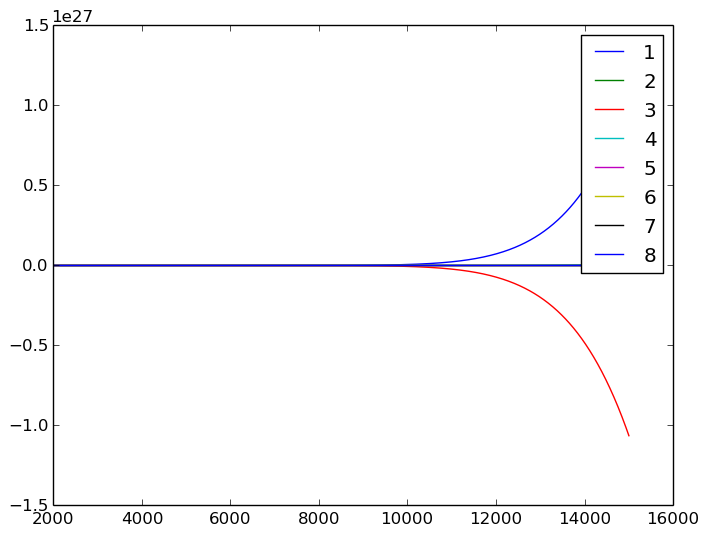

PyObject <matplotlib.legend.Legend object at 0x7f8519eb3f50>

In [65]:
using PyPlot
for i = 1:8
    plot(T,PARTP[:,i], label=i)
end
legend()

## Thermodynamics

Now that we have the different physical values ($p_i$, $x_i$, and $w_i$), we can calculate other thermodynamic properties of interest.

### Compressibility factor
A factor important to... people is the compressibility factor

In [54]:
Z=P./(RHOT.*R0.*T);

### Internal energy

In [55]:
# FIND SPECIFIC INTERNAL ENERGY & DIMENSIONLESS INTERNAL ENERGY
# COMMON REFERENCE STATE OF ZERO ENERGY IS SET AT THE COMPLETE COMBINED
# DIATOMIC STATE
for i = 1:N
    for j = 1:Y
        eel[j] = R[j]*th_el[2,j]*(g[2,j]/g[1,j])*
            exp(-th_el[2,j]/T[i])/(1+(g[2,j]/g[1,j])*exp(-th_el[2,j]/T[i]));
    end

    E[i,1] = 5/2*R[1]*T[i] + R[1]*TH_V[1]/(exp(TH_V[1]/T[i])-1) + eel[1] + e0[1]; #J/KG
    E[i,3] = 5/2*R[3]*T[i] + R[3]*TH_V[3]/(exp(TH_V[3]/T[i])-1) + eel[2] + e0[3]; #J/KG
    E[i,5] = 5/2*R[5]*T[i] + R[5]*TH_V[5]/(exp(TH_V[5]/T[i])-1) + eel[3] + e0[5]; #J/KG
    E[i,2] = 3/2*R[2]*T[i] + eel[4] + e0[2]; #J/KG
    E[i,4] = 3/2*R[4]*T[i] + eel[5] + e0[4]; #J/KG
    E[i,6] = 3/2*R[6]*T[i] + eel[6] + e0[6]; #J/KG
    E[i,7] = 3/2*R[7]*T[i] + eel[7] + e0[7]; #J/KG
    E[i,8] = 3/2*R[8]*T[i] + eel[8] + e0[8]; #J/KG

    E_TOT[i] = 0; #J/KG
    RT[i] = 0;
    for j=1:Y
        e_temp =C[i,j]*E[i,j];
        r_temp =C[i,j]*R[j];
        E_TOT[i]=E_TOT[i]+e_temp;
        RT[i] = RT[i] + r_temp;
    end

    # Dimensionless specific internal energy
    Estar[i] = Z[i]*E_TOT[i]/(RT[i]*T[i]);
end

When you plot the energies against some reference values, there are errors at high temperature. I assumed this was due to inaccuracies in my electrical energy approximation. To find out, I wanted to calculate a comparison between electrical energy and all others.

In [57]:
for i = 1:N
    ecomp[i] = 0; #J/KG
    for j=1:Y
        ecomp_temp =C[i,j]*eel[j]/(1.5*R[j]*T[i]);
        ecomp[i]=ecomp[i]+ecomp_temp;
    end
end

I'll use this value later.

### Enthalpy
Another useful property is the specific enthalpy of the system, as contributed by each molecule.

In [58]:
# FIND SPECIFIC ENTHALPY
for i=1:N
    H_TOT[i]=0; #J/KG
    for j=1:Y
        HH[i,j] = E[i,j] + R[j]*T[i]; # J/KG
        h_temp =C[i,j]*HH[i,j];
        H_TOT[i]=H_TOT[i]+h_temp;
    end
    hstar[i] = Z[i]*H_TOT[i]/(RT[i]*T[i]);
end

### Entropy
One of the most important properties is entropy. It is this property that allows us to connect statistical thermodynamics to classical via Boltzmann's famous equation, $S = k \ln W$

In [59]:
# FIND SPECIFIC ENTROPY & DIMENSIONLESS ENTROPY
for i = 1:N
    for j = 1:Y
        S_el[j] = R[j]*(log(g[1,j]) + log(1+(g[2,j]/g[1,j])*exp(-th_el[2,j]/T[i])) + 
            (g[2,j]/g[1,j])*(th_el[2,j]/T[i])*exp(-th_el[2,j]/T[i])/(1+(g[2,j]/g[1,j])*exp(-th_el[2,j]/T[i])));
    end
    for j =1:Y
        S_t[j] = 5/2*R[j]*log(T[i]) - R[j]*log(P) + R[j]*(log((2*pi*M[j]/(H^2))^(3/2)*K^(5/2))+5/2);
        if j == 1 || j == 3 || j == 5
            S_v[j] = R[j]*(-log(1-exp(-TH_V[j]/T[i])) + TH_V[j]/T[i]/(exp(TH_V[j]/T[i])-1));
            S_r[j] = R[j]*(log(T[i]/(SIGMA[j]*TH_R[j]))+1);
        else
            S_r[j] = 0;
            S_v[j] = 0;
        end
        S[i,j] = S_t[j]+S_r[j]+S_v[j]+S_el[j];
    end

    S_TOT[i] = 0; #J/KG-K
    for j=1:Y
        s_temp =C[i,j]*S[i,j];
        S_TOT[i]=S_TOT[i]+s_temp;
    end
    # Dimensionless specific entropy
    Sstar[i] = Z[i]*S_TOT[i]/(RT[i]);

    scomp[i] = 0; #J/KG
    for j=1:Y
        scomp_temp =C[i,j]*S_el[j]/S_t[j];
        scomp[i]=scomp[i]+scomp_temp;
    end
end

###Specific heat

In [60]:
# Find specific heat
for i =1:N
    for j = 1:Y
        cv_t[j] = (3/2)*R[j];
        #cv_el[j] = 0;
        cv_el[j] = R[j]*(th_el[2,j]/T[i])^2*(g[2,j]/g[1,j])*exp(-th_el[2,j]/T[i])/(1+(g[2,j]/g[1,j])*exp(-th_el[2,j]/T[i]))^2;
        if j == 1 || j == 3 || j == 5
            cv_v[j] = R[j]*((TH_V[j]/(2*T[i]))/(sinh(TH_V[j]/(2*T[i]))))^2;
            cv_r[j] = R[j];
        else
            cv_r[j] = 0;
            cv_v[j] = 0;
        end
        cv[i,j] = cv_t[j]+cv_r[j]+cv_v[j]+cv_el[j];
    end
    cv_tot[i]=0;
    for j=1:Y
        cv_temp =C[i,j]*cv[i,j];
        cv_tot[i]=cv_tot[i]+cv_temp;
    end
    cp_tot[i] = cv_tot[i] + RT[i];
    # Dimensionless specific entropy
    cstar[i] = Z[i]*cv_tot[i]/(RT[i]);
    gamma[i] = cp_tot[i]/cv_tot[i];
    a_ideal = sqrt(1.4*R0*T[i]);
    a[i] = sqrt(gamma[i]*RT[i]*T[i]);
    astar[i] = a[i]/a_ideal;

end

LoadError: DomainError
while loading In[60], in expression starting on line 2